In [1]:
from manim import *

# 1. Static Scenes

This first chapter serves as an introduction to the fundamentals of placing and animating "mobjects" (**m**athematical **objects**) in a manim scene. Because learning works better (and is much more enjoyable) by doing, the eventual goal of the chapter is to recreate the below animation of the Riemann sum. Don't be bothered by the term "static", you will find out about "true" dynamism soon enough in the second chapter.

<video controls width="50%" src="external_media/Ch1_example_Scene.mp4" loop="true"></video>

## 1.1 Placing Objects

### Mobjects (Lines, Squares, Circles, Text, etc.)

Manim has plenty of pre-build geometric mobjects like lines, squares, or circles. More [line-like mobjects](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.line.html#module-manim.mobject.geometry.line) like arrows or other [simple geometric shapes](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.polygram.html) and their respective attributes can be found on the (highly recommended) documentation site.

Certain attributes respecive color, stroke width, and opacity work with several geometric shapes. Feel free to try them out:

* ``color``
* ``stroke_color``
* ``opacity``
* ``stroke_opacity``
* ``stroke_width``

Manim Community v0.19.0

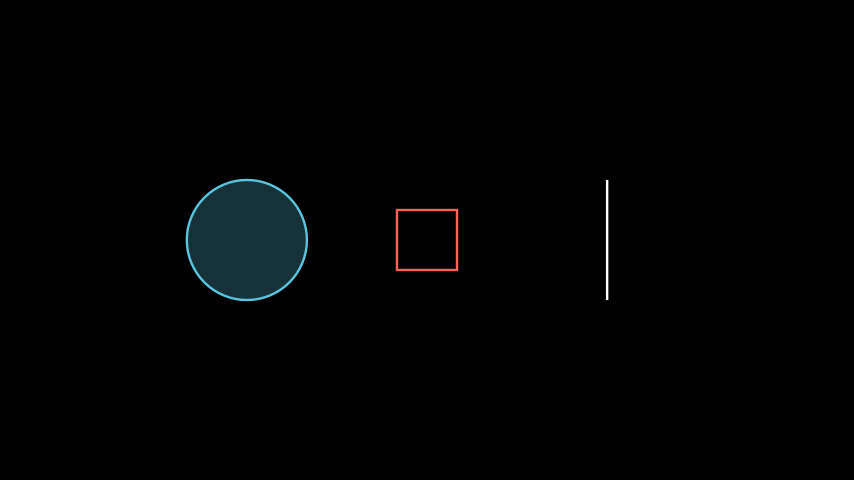

In [ ]:
%%manim -ql --fps 60 -v WARNING --disable_caching first_Scene


class first_Scene(Scene):
	def construct(self):
		# defining a square mobject
		first_square = Square(side_length = 1, color = RED)

		# defining a circle mobject and shifting it 3 units to the left
		first_circle = Circle(radius = 1, color = BLUE, fill_opacity = 0.25).shift(3*LEFT)

		# defining a line with start and end coordinate
		first_line = Line(start = [3, 1, 0], end = [3, -1, 0], color = WHITE, stroke_width = 4)

		# adding all mobjects to the scene
		self.add(first_square, first_circle, first_line)

Besides standard text, manim allows for the rendering of Tex in its scenes, which is obviously needed for fancy math or physics animations. Several ways of [manipulating text](https://docs.manim.community/en/stable/reference/manim.mobject.text.text_mobject.Text.html) can be found in the documentation, here only few of them are shown.

However, what is very useful is accessing and individually marking slices of the displayed text or math. This can be tedious in terms of selecting the right characters and is often a matter of trial and error, but definitely useful. The following cell should provide a nice setup of possible ways to highlight letters or terms in text or equations. It may look overwhelming though --- just continue with the later cells and come back later in that case.

Manim Community v0.19.0

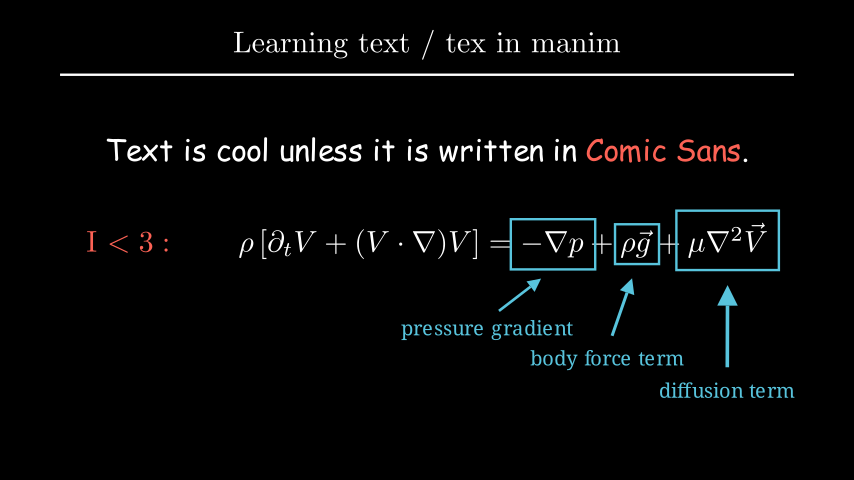

In [ ]:
%%manim -ql --fps 60 -v WARNING --disable_caching text_Scene


class text_Scene(Scene):
	def construct(self):
		# defining an underlined title (cool feature I only found out about far too late)
		first_title = Title("Learning text / tex in manim")

		# defining a text with string 'Comic Sans' colored in 'RED' 
		first_text = Text("Text is cool unless it is written in Comic Sans.", font = "Comic Sans MS", font_size = 36, t2c = {"Comic Sans": RED}).shift(1.5*UP)

		# writing out our favourite equation (obviously Navier Stokes) 
		navier_stokes = Tex(r"I $<3:\qquad\rho\left[\partial_tV+(V\cdot\nabla)V\right]=-\nabla p+\rho\Vec{g}+\mu\nabla^2\vec{V}$").next_to(first_text, 4*DOWN)
		# coloring parts of the string 'RED': the first index selects the string, the second one slices the desired characters
		navier_stokes[0][0:4].set_color(RED)

		# marking the individual terms of the Navier Stokes with surrounding boxes
		pressure_gradient_box = SurroundingRectangle(navier_stokes[0][18:21], buff = 0.2, color = BLUE)
		body_force_term_box = SurroundingRectangle(navier_stokes[0][22:24], buff = 0.1, color = BLUE)
		diffusion_term_box = SurroundingRectangle(navier_stokes[0][26:31], buff = 0.2, color = BLUE)

		# adding descriptions for the right hand side terms
		pressure_gradient_descriptor = Text("pressure gradient", color = BLUE, font_size = 24).move_to([1, -1.5, 0])
		body_force_term_descriptor = Text("body force term", color = BLUE, font_size = 24).move_to([3, -2, 0])
		diffusion_term_descriptor = Text("diffusion term", color = BLUE, font_size = 24).move_to([5, -2.5, 0])  

		# adding arrows pointing from the top of each descriptor to the bottom of the respective boxes
		pressure_gradient_arrow = Arrow(start = pressure_gradient_descriptor.get_top(), end = pressure_gradient_box.get_bottom(), color = BLUE)
		body_force_term_arrow = Arrow(start = body_force_term_descriptor.get_top(), end = body_force_term_box.get_bottom(), color = BLUE)
		diffusion_term_arrow = Arrow(start = diffusion_term_descriptor.get_top(), end = diffusion_term_box.get_bottom(), color = BLUE)

		# adding all mobjects to the scene
		self.add(first_title, first_text, navier_stokes)
		self.add(pressure_gradient_box, body_force_term_box, diffusion_term_box)
		self.add(pressure_gradient_descriptor, body_force_term_descriptor, diffusion_term_descriptor)
		self.add(pressure_gradient_arrow, body_force_term_arrow, diffusion_term_arrow)

### Geometry of a Manim Scene

As hinted in the previous notebooks, there are several ways to place mobjects into the scene. However, it is first helpful to understand the geometry of a manim scene. It is around **14.22 units wide** and **8 units high** and therefore has a format of 16:9. 

The internal coordinates are given by an array / tuple / list of three coordinates $x, y, z$. The coordinate $z$ is perpendicular to the screen and the center of the frame is given as [0, 0, 0]. Directional numpy arrays are predifined as follows and can be quite useful:

* ``UP``:		[0, 1, 0]
* ``DOWN``: 	[0, -1, 0]
* ``LEFT``: 	[-1, 0, 0]
* ``RIGHT``: 	[1, 0, 0]

For placing mobjects, manim offers a wide range of options.

Manim Community v0.19.0

width of a manim scene:		14.222222222222221
height of a manim scene:	8.0


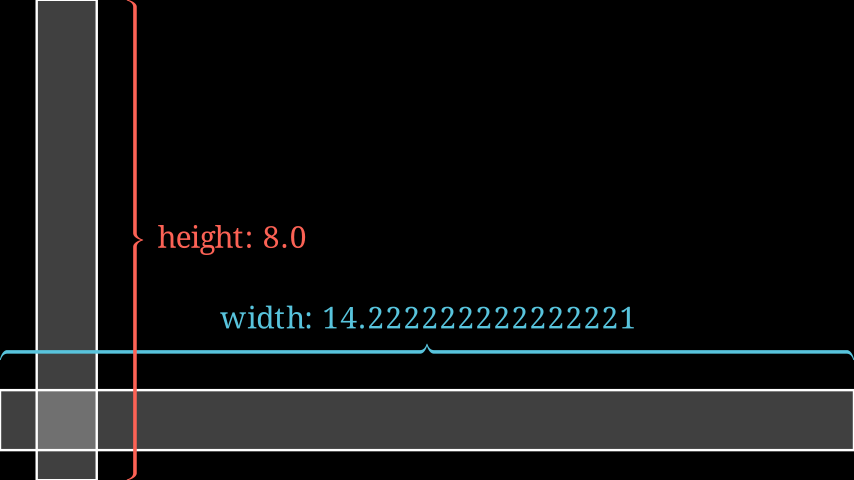

In [ ]:
%%manim -ql --fps 60 -v WARNING --disable_caching geometry_Scene


class geometry_Scene(Scene):
	def construct(self):
		# scene geometry
		frame_width = config.frame_width
		frame_height = config.frame_height

		# printing out the scene geometry
		print(f"width of a manim scene:\t\t{frame_width}")
		print(f"height of a manim scene:\t{frame_height}")

		# creating rectangles spanning the width and height of the scene respectively
		full_width_rect = Rectangle(width = frame_width, height = 1, fill_opacity = 0.25).shift(3*DOWN)
		full_height_rect = Rectangle(width = 1, height = frame_height, fill_opacity = 0.25).shift(6*LEFT)

		# adding braces spanning the sides of both rectangles
		full_width_rect_brace = Brace(full_width_rect, direction = UP, color = BLUE, buff = 0.5, sharpness = 2)
		full_height_rect_brace = Brace(full_height_rect, direction = RIGHT, color = RED, buff = 0.5, sharpness = 2)

		# adding descriptors to the braces
		full_width_rect_brace_descriptor = Text(f"width: {frame_width}", font_size = 36, color = BLUE).next_to(full_width_rect_brace, UP)
		full_height_rect_brace_descriptor = Text(f"height: {frame_height}", font_size = 36, color = RED).next_to(full_height_rect_brace, RIGHT)

		# adding all mobjects to the scene
		self.add(full_width_rect, full_height_rect, full_width_rect_brace, full_height_rect_brace, full_width_rect_brace_descriptor, full_height_rect_brace_descriptor)

### Coordinate Systems

Manims coordinate systems are a mighty tool for mathematical or physical animations.

Manim Community v0.19.0

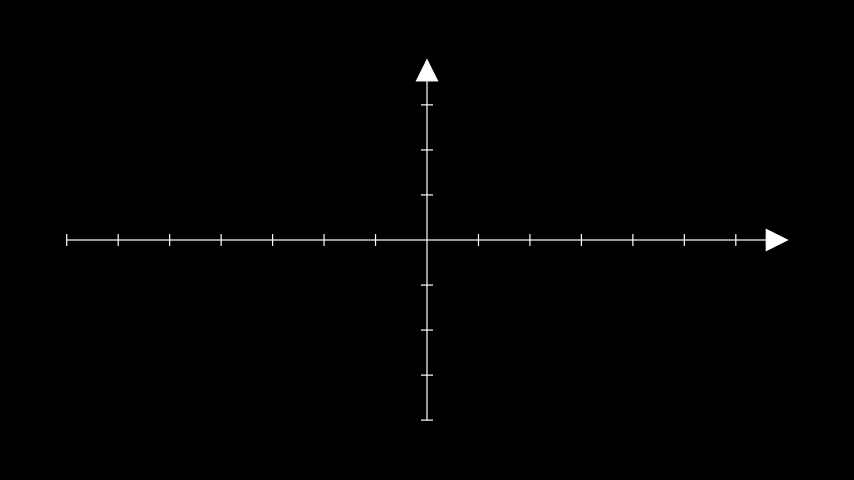

In [4]:
%%manim -ql --fps 60 -v WARNING --disable_caching axes_Scene


class axes_Scene(Scene):
	def construct(self):
		coordinate_system = Axes()

		self.add(coordinate_system)

## 1.2. Animations

In [5]:
44 * 14.59

641.96